## SHAP Exploration

This notebook compares two methods to obtain and visualize SHAP values with LGMB model.

In [1]:
import shap

In [2]:
from preprocess import *
from lgbm_shap import *

In [3]:
train_df, test_df = preprocessing()

Train samples: 307511, test samples: 48744
Application df shape: (356255, 112)
Process application files - done in 0h 00min 09.027547sec
Bureau df shape: (305811, 29)
Process bureau and bureau_balance - done in 0h 00min 18.660262sec
Previous applications df shape: (338605, 52)
Process previous_applications - done in 0h 00min 08.651843sec
Pos-cash balance df shape: (337252, 8)
Process POS-CASH balance - done in 0h 00min 13.407357sec
Installments payments df shape: (339587, 28)
Process installments payments - done in 0h 00min 22.512321sec
Credit card balance df shape: (103558, 6)
Process credit card balance - done in 0h 00min 06.675641sec
Preprocessing Done. Train shape: (307511, 232), test shape: (48744, 232)


## methods 1 : shap values obtained with shap explainer

In [4]:
with timer("Run lgbm shap"):
    sub_preds,shap_values, expected_values, shap_values_bar, feats = lgbm_shap(train_df, test_df, contrib=False)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.796169	training's binary_logloss: 0.521077	valid_1's auc: 0.779177	valid_1's binary_logloss: 0.398847
[400]	training's auc: 0.821699	training's binary_logloss: 0.493301	valid_1's auc: 0.788405	valid_1's binary_logloss: 0.385873
[600]	training's auc: 0.838751	training's binary_logloss: 0.475628	valid_1's auc: 0.790791	valid_1's binary_logloss: 0.379314
[800]	training's auc: 0.852576	training's binary_logloss: 0.461629	valid_1's auc: 0.791053	valid_1's binary_logloss: 0.374654
[1000]	training's auc: 0.865052	training's binary_logloss: 0.448775	valid_1's auc: 0.79116	valid_1's binary_logloss: 0.37042
Early stopping, best iteration is:
[943]	training's auc: 0.861586	training's binary_logloss: 0.45236	valid_1's auc: 0.791258	valid_1's binary_logloss: 0.37157


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Run lgbm shap - done in 0h 03min 52.324746sec


In [5]:
len(shap_values)

2

In [6]:
len(expected_values)

2

In [7]:
expected_values[0]

1.2340696111977125

In [8]:
import matplotlib.pyplot as plt

In [9]:
from matplotlib.colors import ListedColormap

In [10]:
cmap = ListedColormap(["#267302", "#BF0413"])

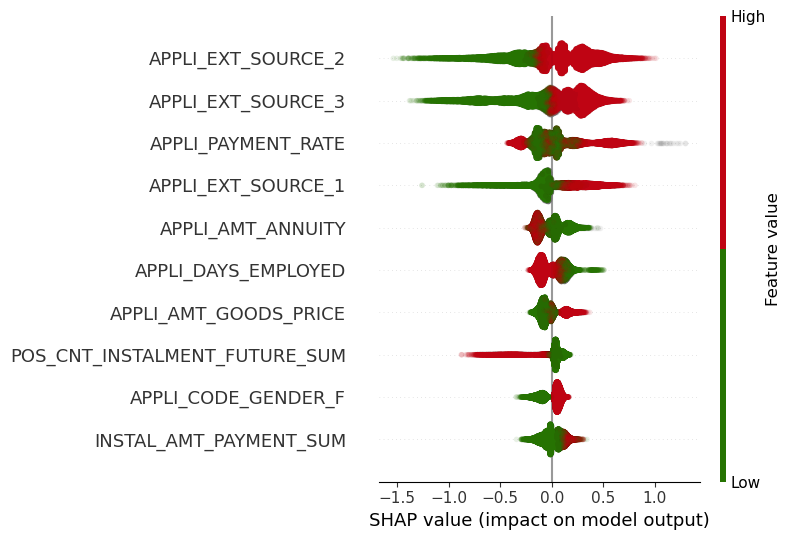

In [11]:
shap.summary_plot(shap_values[0], test_df[feats], feature_names=feats, max_display=10, cmap=cmap, alpha=0.1)

In [12]:
cmap = ListedColormap(["#267302", "#BF0413"])

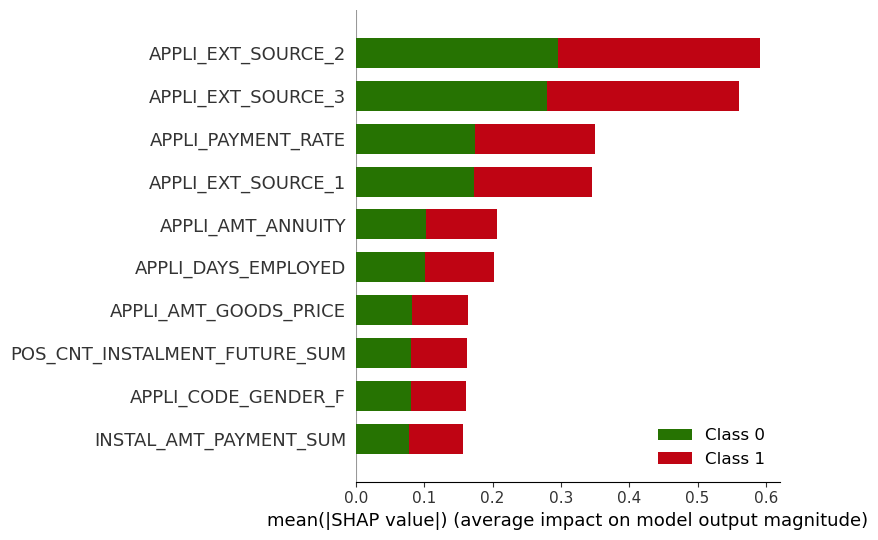

In [13]:
shap.summary_plot(shap_values, test_df[feats], feature_names=feats, max_display=10, color=cmap)

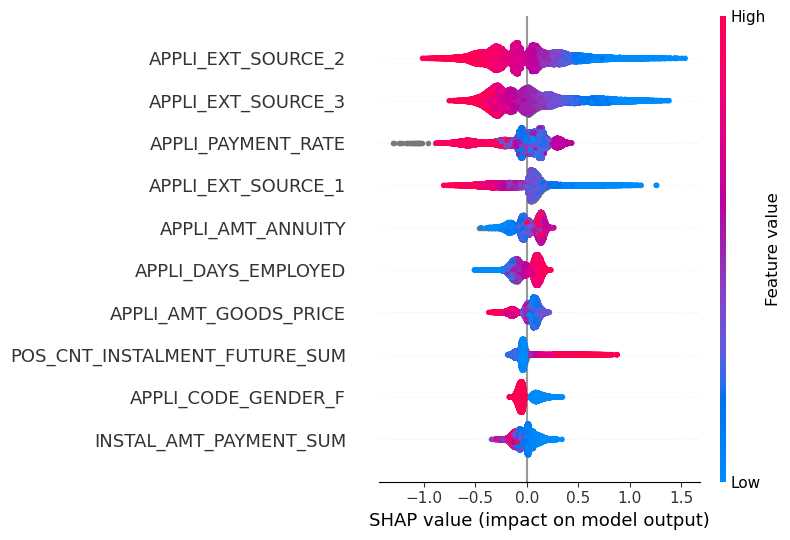

In [14]:
shap.summary_plot(shap_values[1], test_df[feats], feature_names=feats, max_display=10)

In [15]:
shap_values_bar[:,:,1].shape

(48744, 230)

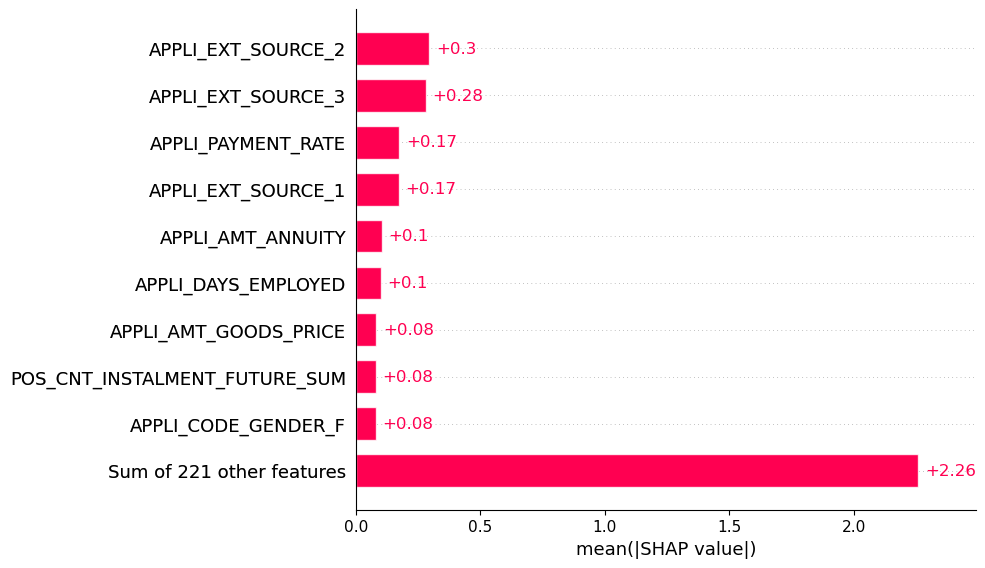

In [16]:
shap.plots.bar(shap_values_bar[:,:,1])

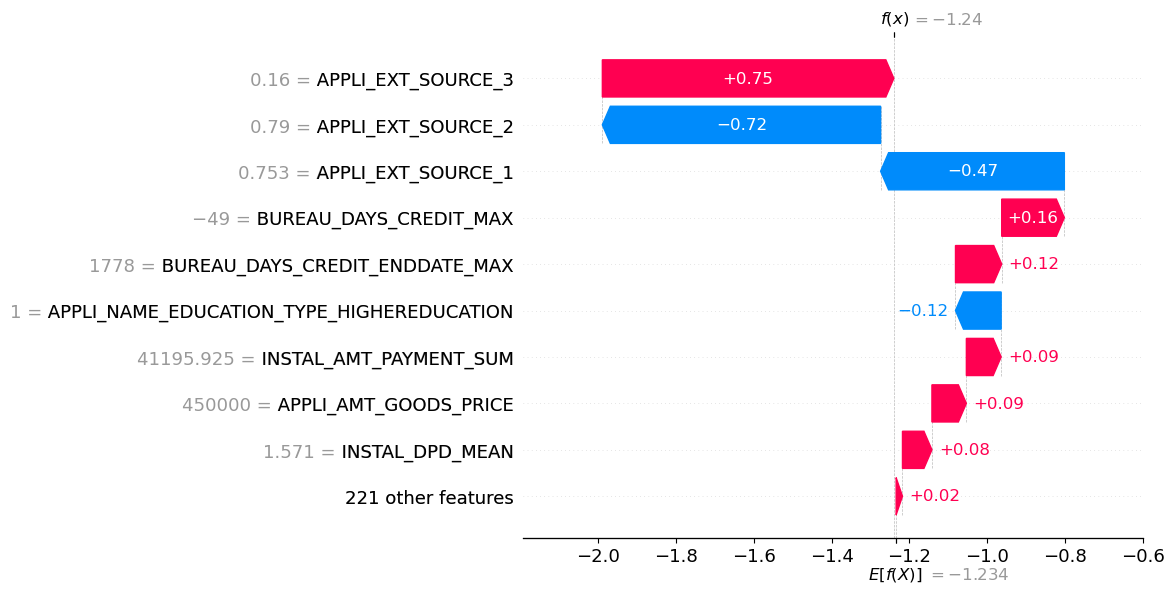

In [17]:
shap.plots.waterfall(shap_values_bar[0,:,1], max_display=10, show=True)

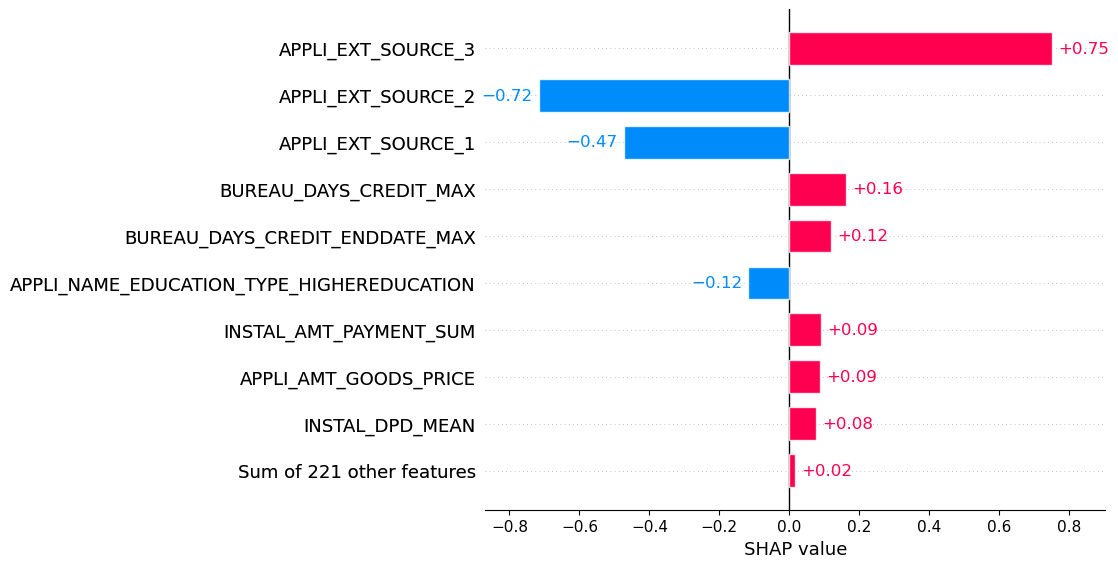

In [18]:
shap.plots.bar(shap_values_bar[0,:,1])

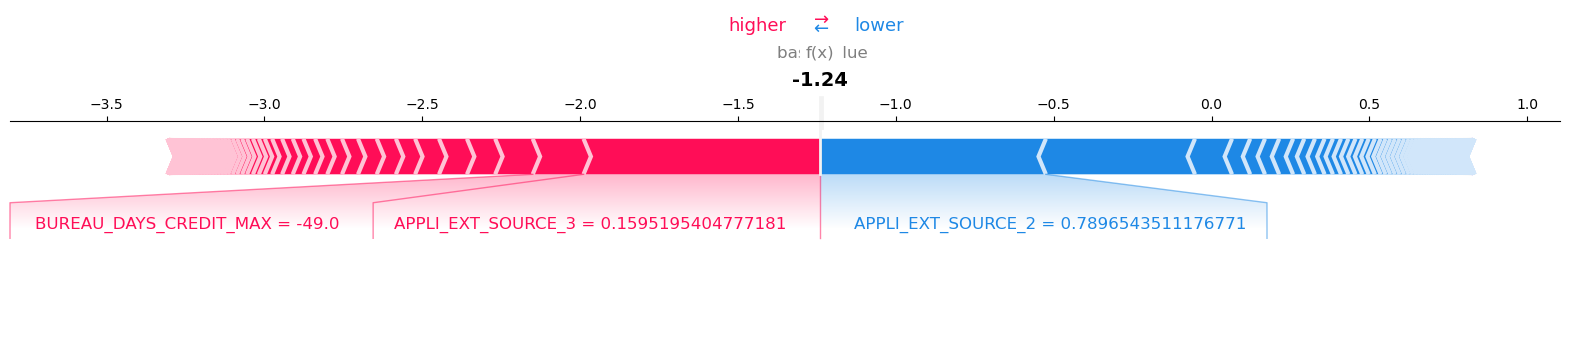

In [19]:
shap.force_plot(expected_values[1], shap_values[1][0], test_df[feats].iloc[0], feature_names=feats,contribution_threshold=0.05,
                link='identity', matplotlib=True, plot_cmap="RdGr")

In [20]:
cmap = ListedColormap(["#267302", "#65A603", "#65A603", "#F29F05", "#F28705",
               "#F27405", "#F25C05", "#F24405", "#F21D1D", "#BF0413"])

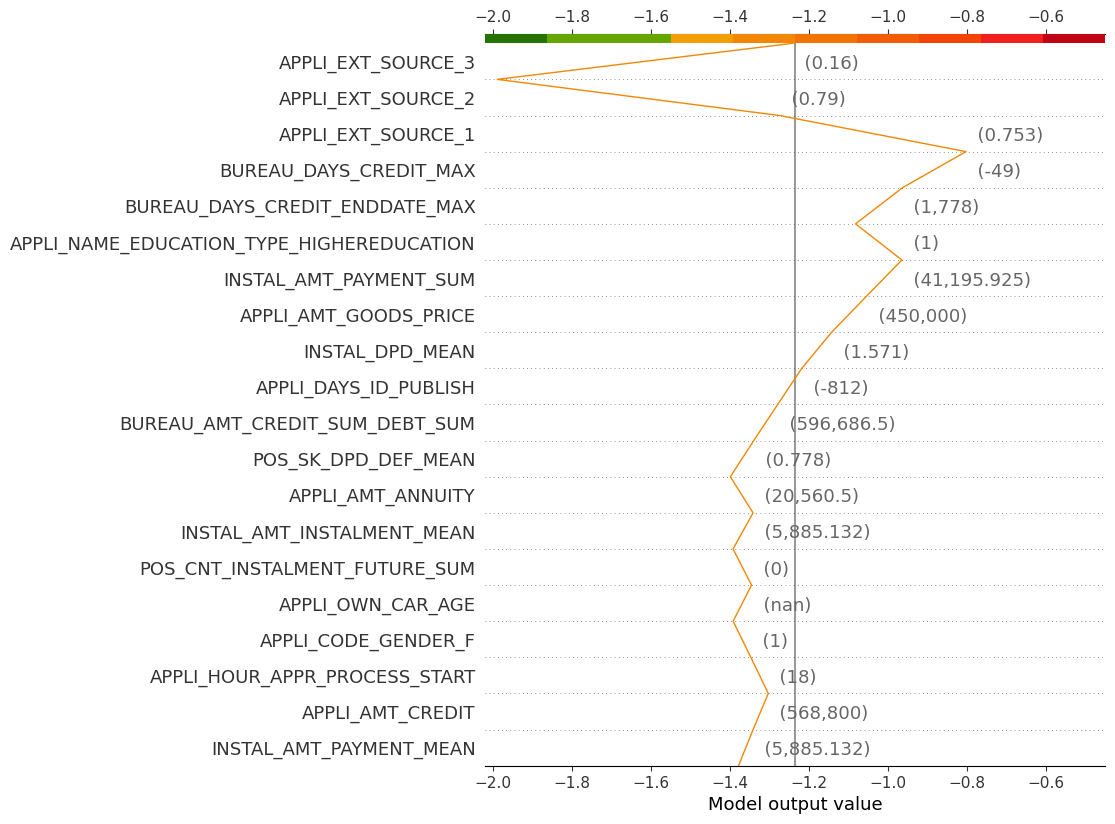

In [21]:
shap.decision_plot(expected_values[1],shap_values[1][0], test_df[feats].iloc[0], feature_names=feats, link='identity',plot_color=cmap)

## Method 2 :  SHAP values obtained with predict contrib from LGBM

In [23]:
with timer("Run lgbm shap"):
    sub_preds, contribs, feats = lgbm_shap(train_df, test_df, contrib=True)

Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.796964	training's binary_logloss: 0.519777	valid_1's auc: 0.771261	valid_1's binary_logloss: 0.398309
[400]	training's auc: 0.821733	training's binary_logloss: 0.492708	valid_1's auc: 0.782497	valid_1's binary_logloss: 0.385068
[600]	training's auc: 0.839044	training's binary_logloss: 0.474823	valid_1's auc: 0.785947	valid_1's binary_logloss: 0.378117
[800]	training's auc: 0.852849	training's binary_logloss: 0.46088	valid_1's auc: 0.786956	valid_1's binary_logloss: 0.373289
[1000]	training's auc: 0.865162	training's binary_logloss: 0.448095	valid_1's auc: 0.787293	valid_1's binary_logloss: 0.368875
[1200]	training's auc: 0.876202	training's binary_logloss: 0.43627	valid_1's auc: 0.78744	valid_1's binary_logloss: 0.364891
Early stopping, best iteration is:
[1145]	training's auc: 0.873347	training's binary_logloss: 0.439373	valid_1's auc: 0.787451	valid_1's binary_logloss: 0.365917
Run lgbm shap - done 

In [24]:
contribs

array([[ 1.26776344e-02,  2.41944261e-03, -1.89129642e-03, ...,
        -7.93893426e-03,  1.76137707e-04, -1.27348037e+00],
       [ 7.27861966e-03,  8.16291833e-03,  3.02271565e-04, ...,
        -1.11061057e-02,  3.56712464e-04, -1.27348037e+00],
       [ 1.09807450e-02, -6.29156591e-03,  4.52530270e-04, ...,
        -2.53964348e-02,  2.04702186e-04, -1.27348037e+00],
       ...,
       [ 1.12531318e-02, -2.93654730e-03,  2.60073674e-04, ...,
        -1.27573688e-02,  4.58409225e-04, -1.27348037e+00],
       [ 9.87344277e-03,  5.93811964e-03, -3.62824250e-03, ...,
        -9.71497315e-03,  5.18949215e-04, -1.27348037e+00],
       [ 8.16893923e-03, -5.89631562e-03, -9.56777469e-04, ...,
        -6.05457311e-03, -1.44793750e-05, -1.27348037e+00]])

In [25]:
contribs.shape

(48744, 231)

In [26]:
shap_contribs=contribs[:,:-1]

In [27]:
shap_contribs.shape

(48744, 230)

In [28]:
exp_contribs=contribs[:,-2:-1]

In [29]:
exp_contribs.shape

(48744, 1)

In [30]:
feat_names=[feat.capitalize() for feat in feats]

In [31]:
len(feat_names)

230

In [32]:
Xshap=np.array(test_df[feats])

In [33]:
Xshap.shape

(48744, 230)

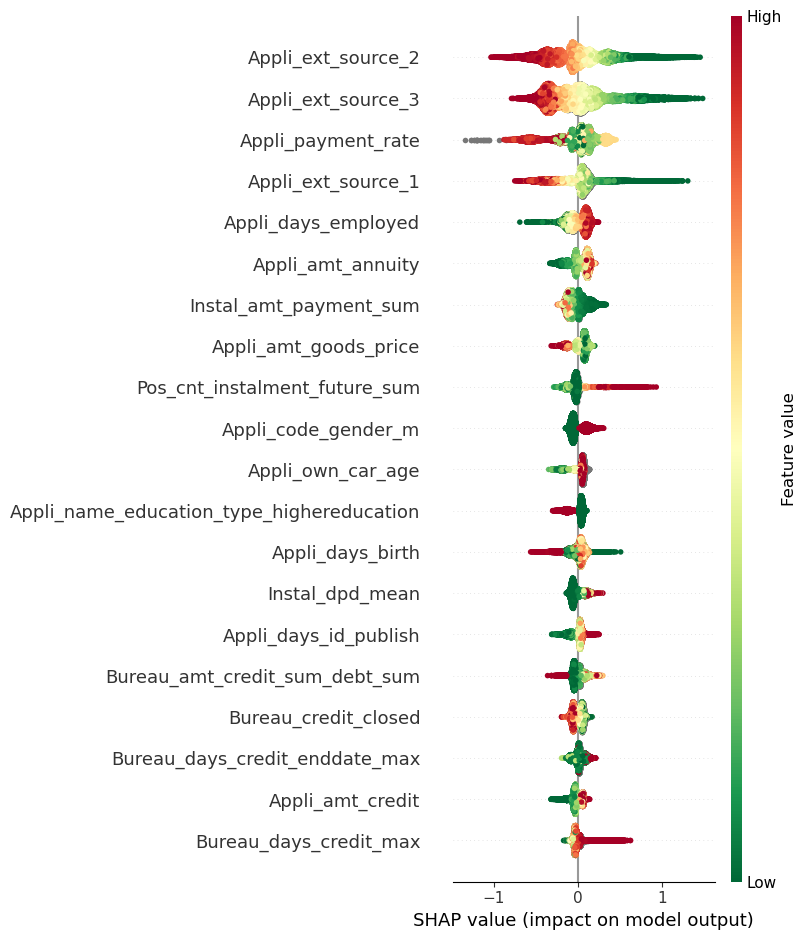

In [34]:
shap.summary_plot(shap_contribs, Xshap, feature_names=feat_names, max_display=20, cmap="RdYlGn_r")

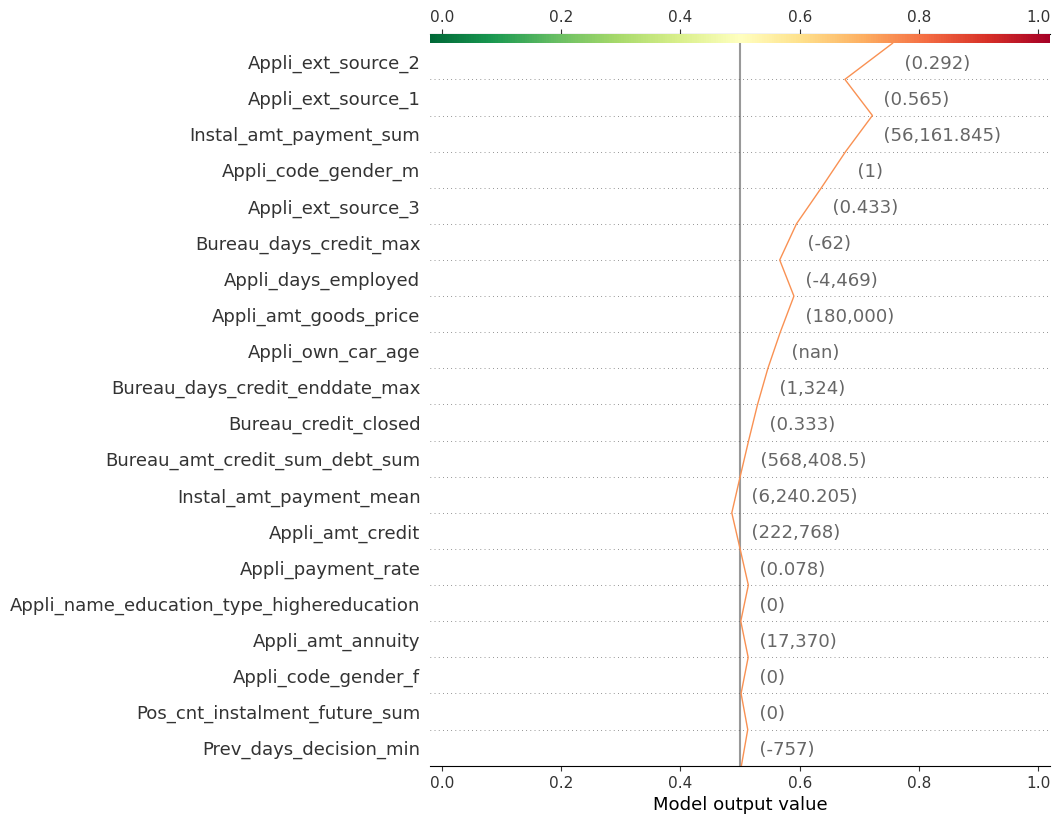

In [35]:
shap.decision_plot(exp_contribs[1],shap_contribs[1], Xshap[1], feature_names=feat_names, link='logit',plot_color="RdYlGn_r")

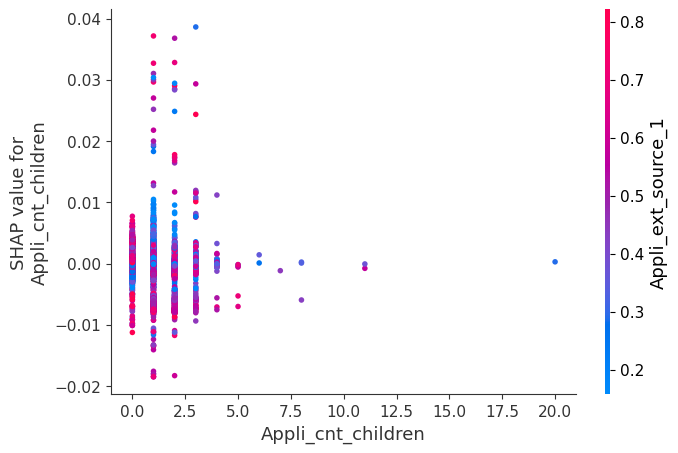

In [37]:
shap.dependence_plot(3, shap_contribs, Xshap, feature_names=feat_names)

In [38]:
feat_names[40]

'Appli_code_gender_m'

In [39]:
group_mask=Xshap[:,40]==1

In [40]:
group_mask

array([False,  True,  True, ..., False,  True, False])

FixedFormatter should only be used together with FixedLocator


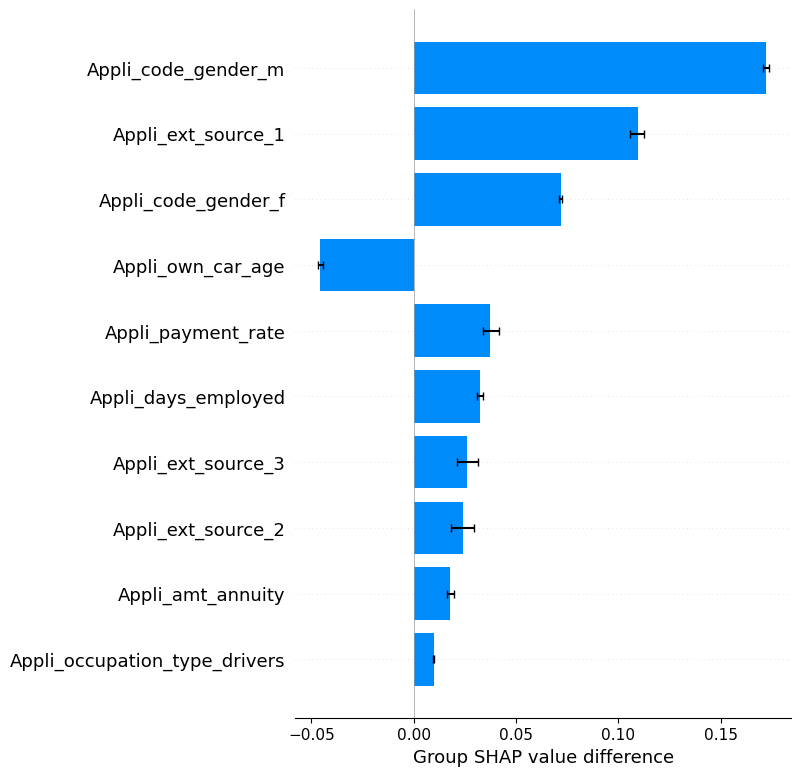

In [41]:
shap.group_difference_plot(shap_contribs, group_mask, feature_names=feat_names, max_display=10)